In [37]:
#GBM
import math
import numpy

#mu = in % (Expected Return)
#sigma = in % (Standard deviation)

def dS(S,mu,sigma,deltaT):
    return S*mu + sigma*numpy.random.normal(loc=0.0, scale=1.0)*math.sqrt(deltaT)

In [38]:
print(dS(10,0.05,0.02,1))

0.5150315623511326


In [93]:
#Now we have to deal with real data
quotes_GE_in = []
quotes_GE = []
import csv
with open('data/GE.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        try:
            if(float(row[1]) != 0.0):
                quotes_GE_in.append(float(row[1]))
        except:
            print("Invalid symbol")

for i in range(0,len(quotes_GE_in)):
    try:
        quotes_GE.append(quotes_GE_in[len(quotes_GE_in)-i])
    except:
        print("Some error")



Invalid symbol
Some error


In [94]:
import matplotlib.pyplot as plt

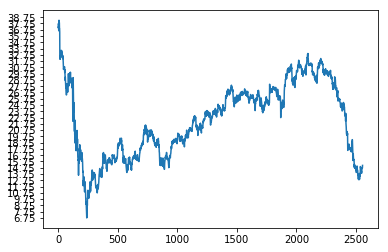

In [95]:
plt.plot(range(0,len(quotes_GE)),quotes_GE)
plt.yticks(numpy.arange(min(quotes_GE), max(quotes_GE)+1, 1.0))
plt.show()

Some error


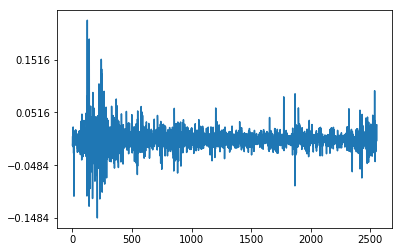

In [99]:
#Now the big question - how do we turn this into something useful?
diff = []
for i in range(0,len(quotes_GE)):
    try:
        diff.append((quotes_GE[i+1] - quotes_GE[i])/quotes_GE[i])
    except:
        print("Some error")


plt.plot(range(0,len(diff)),diff)
plt.yticks(numpy.arange(min(diff), max(diff), 0.1))
plt.show()

In [106]:
y, x = numpy.histogram(diff, bins=10, range=None, normed=True, weights=None, density=None)
print(x)

[-0.1483871  -0.11088621 -0.07338533 -0.03588445  0.00161644  0.03911732
  0.0766182   0.11411909  0.15161997  0.18912085  0.22662174]


In [107]:
print(y)

[4.17308898e-02 1.46058114e-01 6.88559682e-01 1.40633099e+01
 1.10482531e+01 5.00770678e-01 1.14759947e-01 3.12981674e-02
 1.04327225e-02 2.08654449e-02]


(array([  1.,   0.,   1.,   2.,   3.,   4.,   3.,   4.,   8.,  10.,  15.,
         33.,  52., 149., 414., 733., 633., 263., 119.,  44.,  24.,  10.,
         13.,   1.,   6.,   4.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([-0.1483871 , -0.13901188, -0.12963666, -0.12026143, -0.11088621,
        -0.10151099, -0.09213577, -0.08276055, -0.07338533, -0.06401011,
        -0.05463489, -0.04525967, -0.03588445, -0.02650923, -0.01713401,
        -0.00775878,  0.00161644,  0.01099166,  0.02036688,  0.0297421 ,
         0.03911732,  0.04849254,  0.05786776,  0.06724298,  0.0766182 ,
         0.08599342,  0.09536864,  0.10474386,  0.11411909,  0.12349431,
         0.13286953,  0.14224475,  0.15161997,  0.16099519,  0.17037041,
         0.17974563,  0.18912085,  0.19849607,  0.20787129,  0.21724651,
         0.22662174]),
 <a list of 40 Patch objects>)

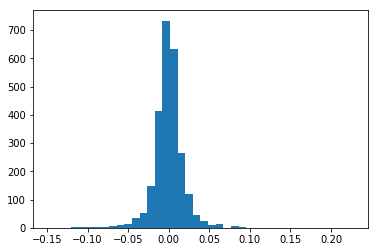

In [111]:
plt.hist(diff, bins=40,normed=False)

In [113]:
print(numpy.mean(diff))
print(numpy.std(diff))

-0.00013872810228862615
0.020945234240828052


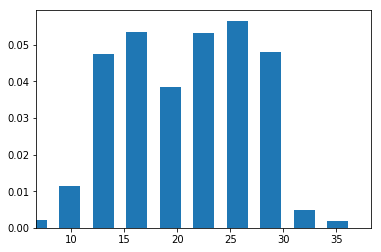

In [73]:
#Or otherwise'
plt.bar(x[:-1], y, width = 2)
plt.xlim(min(x), max(x))
plt.show() 

#But this is still very useless...

In [112]:
#Now the real hard work begins...

In [114]:
# Geometric Brown Motion

In [115]:
#GBM
import math
import numpy

#mu = in % (Expected Return)
#sigma = in % (Standard deviation)

def dS(S,mu,sigma,deltaT):
    return S*mu + sigma*numpy.random.normal(loc=0.0, scale=1.0)*math.sqrt(deltaT)

In [125]:
print(dS(10,-0.00013,0.0209,1))

-0.01982120419382613


In [129]:
futurePrices = []

futurePrices.append(10.0)

for i in range(1,20):
    futurePrices.append(round(futurePrices[i-1] + dS(futurePrices[i-1],-0.00013,0.0209,1),2))

In [130]:
print(futurePrices)

[10.0, 9.98, 10.0, 9.98, 9.98, 9.96, 9.98, 9.99, 10.02, 10.01, 9.94, 9.93, 9.93, 9.93, 9.93, 9.92, 9.93, 9.95, 9.98, 9.99]


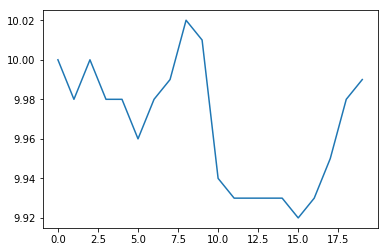

In [131]:
plt.plot(futurePrices)

In [140]:
futurePrices = []
futurePrices.append(10.0)
for i in range(1,182):
    futurePrices.append(round(futurePrices[i-1] + dS(futurePrices[i-1],-0.00013,0.0209,1),2))

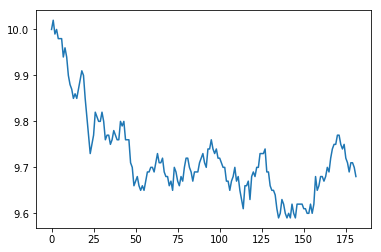

In [141]:
plt.plot(futurePrices)

In [152]:
futureRealizations = []

for j in range(0,1000):
    futurePrices = []
    futurePrices.append(10.0)
    for i in range(1,182):
        futurePrices.append(round(futurePrices[i-1] + dS(futurePrices[i-1],-0.00013,0.0209,1),2))
    futureRealizations.append(futurePrices)

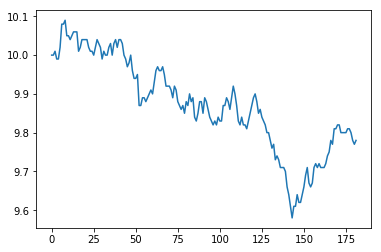

In [153]:
plt.plot(futureRealizations[5])

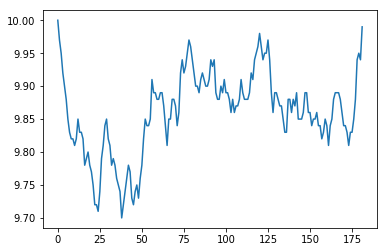

In [154]:
plt.plot(futureRealizations[10])

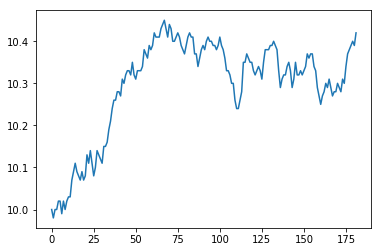

In [155]:
plt.plot(futureRealizations[12])

In [156]:
pnl = []

for r in futureRealizations:
    pnl.append(r[-1] - r[0])


(array([ 1.,  0.,  1.,  1.,  2.,  4.,  5.,  7., 10., 11., 24., 24., 28.,
        43., 46., 67., 71., 82., 73., 84., 76., 59., 74., 46., 44., 20.,
        32., 20., 17.,  7.,  9.,  5.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,
         1.]),
 array([-1.28   , -1.22475, -1.1695 , -1.11425, -1.059  , -1.00375,
        -0.9485 , -0.89325, -0.838  , -0.78275, -0.7275 , -0.67225,
        -0.617  , -0.56175, -0.5065 , -0.45125, -0.396  , -0.34075,
        -0.2855 , -0.23025, -0.175  , -0.11975, -0.0645 , -0.00925,
         0.046  ,  0.10125,  0.1565 ,  0.21175,  0.267  ,  0.32225,
         0.3775 ,  0.43275,  0.488  ,  0.54325,  0.5985 ,  0.65375,
         0.709  ,  0.76425,  0.8195 ,  0.87475,  0.93   ]),
 <a list of 40 Patch objects>)

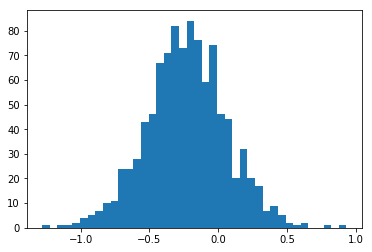

In [157]:
plt.hist(pnl,bins=40)

In [166]:
import random
def dS(S,mu,sigma,deltaT):
    return S*random.sample(diff,1)[0] + sigma*numpy.random.normal(loc=0.0, scale=1.0)*math.sqrt(deltaT)


futureRealizations = []

for j in range(0,1000):
    futurePrices = []
    futurePrices.append(10.0)
    for i in range(1,182):
        futurePrices.append(round(futurePrices[i-1] + dS(futurePrices[i-1],-0.00013,0.0209,1),2))
    futureRealizations.append(futurePrices)

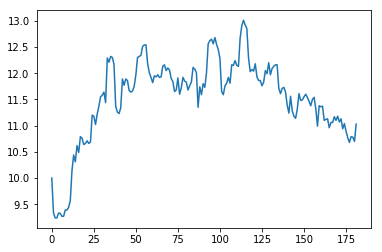

In [167]:
plt.plot(futureRealizations[3])